#**Python Code Implementation of t-SNE on MNIST Dataset**


#Step 1 :
##Importing Necessary Modules.

In [ ]:
# Step 1: Importing Necessary Modules
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Step 2 :
## load the MNIST_test dataset into pandas dataframe

In [ ]:
# Step 2: Load the MNIST_test dataset into pandas dataframe
mnist = datasets.fetch_openml('mnist_784', version=1)
df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
df['label'] = mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
<ipython-input-6-2628bcb4f50a>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['label'] = mnist.target


In [ ]:
# Drop the label feature and
# store the pixel data in d.

# Drop the label feature and store the pixel data in d
d = df.drop('label', axis=1)

# Step 3  :
## Standardize the data

In [ ]:
# Data-preprocessing: Standardizing the data

# Step 3: Standardize the data
scaler = StandardScaler()
d_scaled = scaler.fit_transform(d)

# Step 4 :  Reduce the columns data to 2 dimensions




In [ ]:
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points

# Step 4: Reduce the columns data to 2 dimensions
# Picking the top 1000 points for TSNE
n_points = 1000  # Number of points to consider for t-SNE
d_top = d_scaled[:n_points]

In [ ]:
# Assuming 'label' column exists in the original dataframe 'df'

# Extract labels from the original dataframe
labels = df['label'][:n_points]

# Step 5 :
## define the model

In [ ]:
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000

# Step 5: Define the model
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)

# Step 6 :
## Fit the model

In [ ]:
# creating a new data frame which
# help us in plotting the result data

# Step 6: Fit the model
tsne_result = tsne.fit_transform(d_top)

# Create a new dataframe for plotting
tsne_df = pd.DataFrame(data=tsne_result, columns=['Component 1', 'Component 2'])
tsne_df['label'] = labels

# Step 7 :
##  Plotting the result

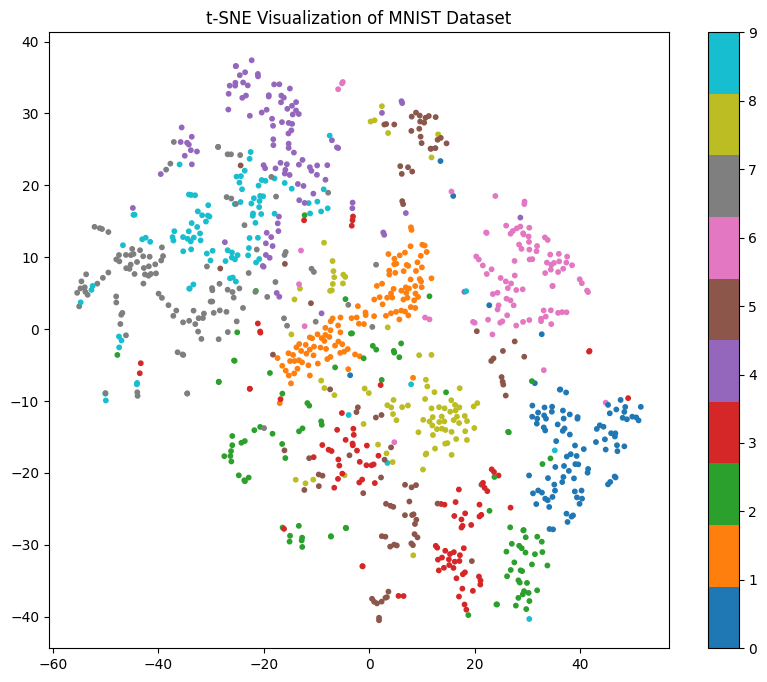

In [ ]:
# Step 7: Plotting the result

# Convert categorical labels to integers
label_mapping = {str(i): i for i in range(10)}
tsne_df['label_int'] = tsne_df['label'].map(label_mapping)

# Plotting the result
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Component 1'], tsne_df['Component 2'], c=tsne_df['label_int'], cmap='tab10', s=10)
plt.colorbar()
plt.title('t-SNE Visualization of MNIST Dataset')
plt.show()

#**Well Done**